# Pymaceuticals Inc.
---

### Analysis

Based on the provided data, we see that majority of the mice received the Capomulin and Ramicane drug. We also see that the mice that received one of these two drugs had smaller tumors versus mice that took Infubinol and Ceftamin.

Looking at Mouse l509, it received the Capomulin drug and within 30 days the size of its tumor decreased. However, after 35 days, the tumor started to grow again.

In conclusion, the Capomulin drug is effective in decreasing the size of tumors in mice.
 

In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# result = pd.merge(df1, df2, on='key_column')
combined_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [273]:
# Checking the number of mice.
# n_columns = len(df.columns)
mouse_number = len(combined_results["Mouse ID"].value_counts())
mouse_number

249

In [274]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mouse
                                                             

array(['g989'], dtype=object)

In [275]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = combined_results.loc[combined_results["Mouse ID"]=='g989', :]
duplicate_id



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [276]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_results.loc[combined_results['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [277]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(pd.unique(clean_df['Mouse ID']))
mice_number

248

## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
vol_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
vol_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vol_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
vol_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
vol_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean': vol_mean, 
                           'Median': vol_median, 
                           'Variance': vol_var, 
                           'Standard Deviation': vol_std, 
                           'SEM': vol_sem
    
})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

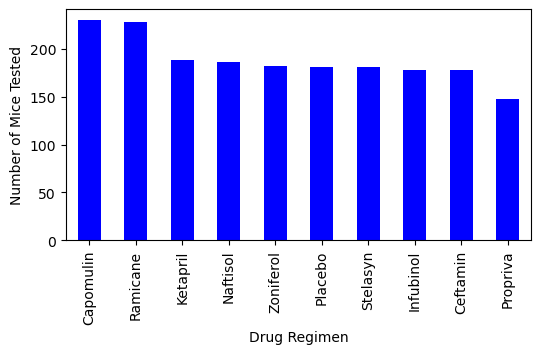

In [280]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# df.plot(kind='bar', x='drug_regimen', y='timepoints')
mouse_tested = clean_df['Drug Regimen'].value_counts()
mouse_tested.plot(kind='bar', figsize=(6,3), color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

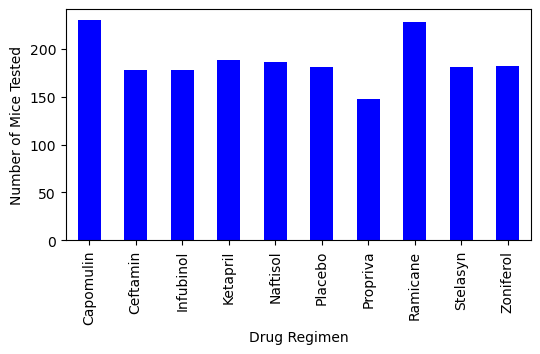

In [281]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_num = mouse_drug.plot.bar(figsize=(6,3),color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()




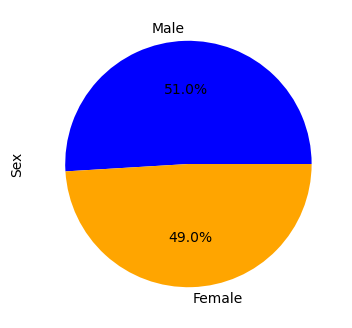

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_number = clean_df['Sex'].value_counts()
labels = ["Male", "Female"]
colors = ["blue", "orange"]
explode = (0,0)
sex_number.plot(kind="pie", explode=explode, labels=labels, colors=colors, figsize=(6,4), autopct="%1.1f%%")
plt.show()

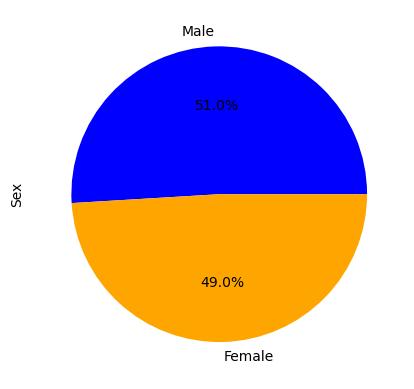

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "orange"]
explode = (0,0)

plt.pie(sex_number, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [372]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Capimulin
capo_drug = combined_results.loc[combined_results["Drug Regimen"] == "Capomulin",:]
rami_drug = combined_results.loc[combined_results["Drug Regimen"] == "Ramicane",:]
infu_drug = combined_results.loc[combined_results["Drug Regimen"] == "Infubinol",:]
ceft_drug = combined_results.loc[combined_results["Drug Regimen"] == "Ceftamin",:]

capo_tumor = capo_drug["Tumor Volume (mm3)"]
rami_tumor = rami_drug["Tumor Volume (mm3)"]
infu_tumor = infu_drug["Tumor Volume (mm3)"]
ceft_tumor = ceft_drug["Tumor Volume (mm3)"]

drug_treatment = pd.concat([capo_drug, rami_drug, infu_drug, ceft_drug])

In [373]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

merge_great_time = pd.merge(drug_treatment, greatest_time, on='Mouse ID')


In [374]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_row = merge_great_time.loc[merge_great_time['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(mouse_row)
    
    # Determine outliers using upper and lower bounds
    quartiles = mouse_row.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = mouse_row.loc[(mouse_row>upper_bound)|(mouse_row<lower_bound)]
    print(f'{drug}s potential outliers: {outliers}')

Capomulins potential outliers: 8    25.472143
9    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicanes potential outliers: 239    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinols potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


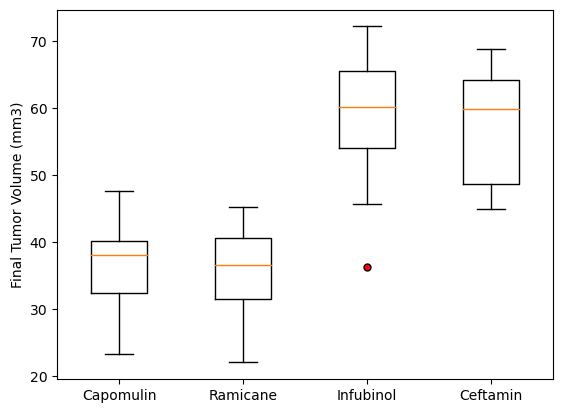

In [356]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker':'o', 'markerfacecolor':'red','markersize':5})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

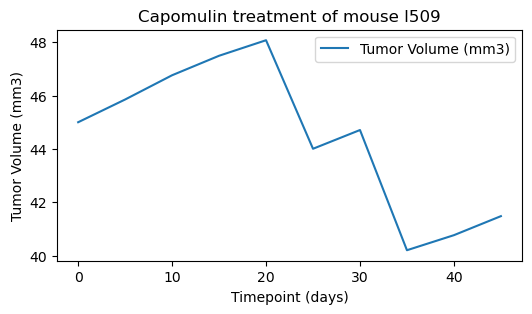

In [357]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse=capo_drug.loc[capo_drug['Mouse ID']=='l509']
capo_mouse.plot(kind="line",x='Timepoint',y='Tumor Volume (mm3)',figsize = (6,3))
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


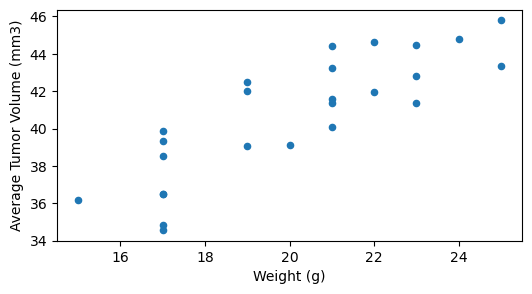

In [364]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_average = capo_drug.groupby('Mouse ID')
weight = mouse_average['Weight (g)'].mean()
tumor_average = mouse_average['Tumor Volume (mm3)'].mean()
capo_tumor_df=pd.DataFrame({'Weight (g)':weight, 'Average Tumor Volume (mm3)':tumor_average})
capo_tumor_df.plot(kind="scatter",x='Weight (g)',y='Average Tumor Volume (mm3)', figsize=(6,3))
plt.show()

## Correlation and Regression

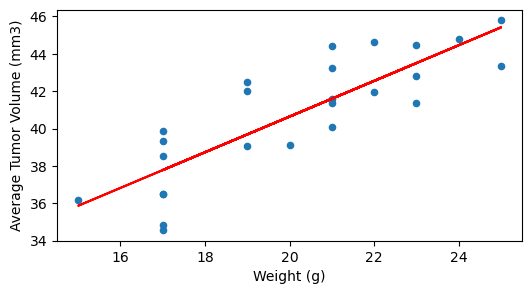

The correlation between mouse weight and the average tumor volume is 0.84


In [366]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_weight = capo_tumor_df['Weight (g)']
y_tumor = capo_tumor_df['Average Tumor Volume (mm3)']

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_weight,y_tumor)
regress = x_weight*slope+intercept
line = "y = "+str(round(slope,2)) + "x +"+str(round(intercept,2))

capo_tumor_df.plot(kind="scatter",x='Weight (g)',y='Average Tumor Volume (mm3)', figsize=(6,3))
plt.plot(x_weight,regress,"r-")
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_weight,y_tumor)[0],2)}')